In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm

In [6]:
root_file = '../root/MG5_aMC_v2_7_3/SS2l/Events/run_02/tag_1_delphes_events.root'
f_Att = uproot.open(root_file)

In [7]:
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)

In [8]:
tree_electron_Att = f_Att['Delphes;1/Electron']
tree_muon_Att = f_Att['Delphes;1/Muon']
tree_jet_Att = f_Att['Delphes;1/Jet']
tree_Emiss_Att = f_Att['Delphes;1/MissingET']
tree_Ht_Att = f_Att['Delphes;1/ScalarHT']

# Define Branches
Att_electron = tree_electron_Att.arrays(['Electron.Charge',
                                        'Electron.PT',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
Att_muon = tree_muon_Att.arrays(['Muon.Charge',
                                'Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
Att_jet = tree_jet_Att.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi'], library='ak')
Att_Emiss = tree_Emiss_Att.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
Att_Ht = tree_Ht_Att.arrays(['ScalarHT.HT'])



In [9]:
# Define Variables
EventSize = len(Att_jet['Jet.Mass'])
jet_sort_pt = ak.sort(Att_jet['Jet.PT'], axis=-1, ascending=False)
jet_num = ak.num(Att_jet['Jet.PT'], axis=-1)
lepton_sort_pt = ak.sort(ak.concatenate([Att_electron['Electron.PT'], Att_muon['Muon.PT']], axis=-1), axis=-1, ascending=False)
lepton_charge = ak.Array.tolist(ak.concatenate([Att_electron['Electron.Charge'], Att_muon['Muon.Charge']], axis=-1))
lepton_eta = ak.concatenate([Att_electron['Electron.Eta'], Att_muon['Muon.Eta']], axis=-1)
lepton_phi = ak.concatenate([Att_electron['Electron.Phi'], Att_muon['Muon.Phi']], axis=-1)
bjet_pt = Att_jet['Jet.PT']*Att_jet['Jet.BTag']
bjet_eta = Att_jet['Jet.Eta']*Att_jet['Jet.BTag']
bjet_phi = Att_jet['Jet.Phi']*Att_jet['Jet.BTag']
two_lepton = ak.where(ak.num(lepton_sort_pt)>=2)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5]


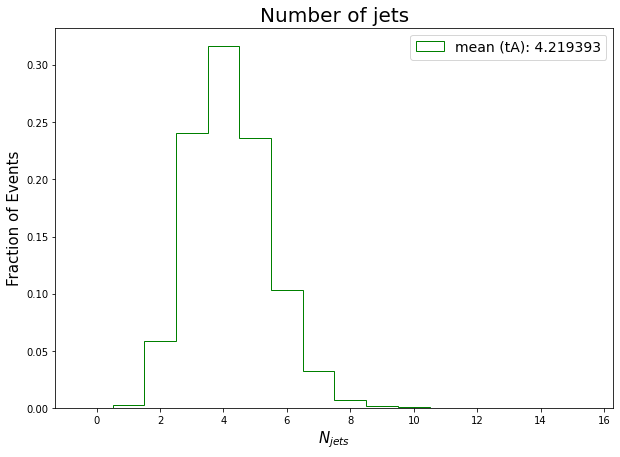

In [33]:
# Number of jets
plt.figure(figsize=(10,7)) 
bin = np.linspace(-0.5, 15.5, 17)
print(bin)
plt.hist(jet_num, bins=bin, density=True, histtype='step', color='green', label='mean (tA): %f' %np.mean(jet_num))
plt.legend(fontsize=14)
plt.xlabel(r'$N_{jets}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Number of jets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

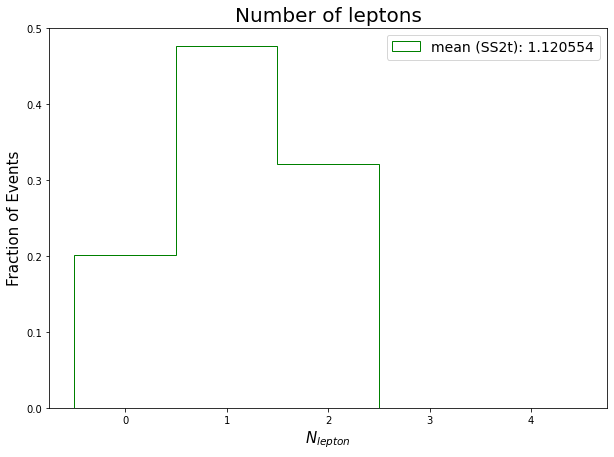

In [40]:
# Number of Leptons
plt.figure(figsize=(10, 7))
bin = np.linspace(-0.5, 4.5, 6)
plt.hist(ak.num(lepton_sort_pt), bins=bin, density=True, histtype='step', color='green', label='mean (SS2t): %f' %np.mean(ak.num(lepton_sort_pt)))
plt.legend(fontsize=14)
plt.xlabel(r'$N_{lepton}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Number of leptons', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

100%|██████████| 2671/2671 [00:02<00:00, 1030.43it/s]


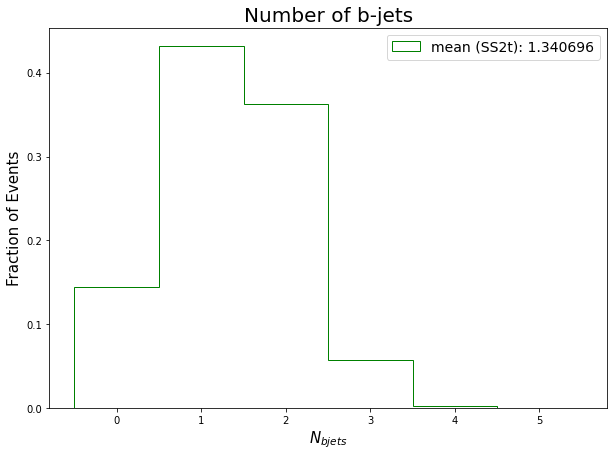

In [39]:
# Number of bjets
num_bjet = []
for i in tqdm(range(EventSize)):
    b_pt = bjet_pt[i]
    num_bjet.append(len(b_pt[ak.where(b_pt)]))
            
plt.figure(figsize=(10, 7))
bin = np.linspace(-0.5, 5.5, 7)
plt.hist(num_bjet, bins=bin, density=True, histtype='step', color='green', label='mean (SS2t): %f' %np.mean(num_bjet))
plt.legend(fontsize=14)
plt.xlabel(r'$N_{bjets}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Number of b-jets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

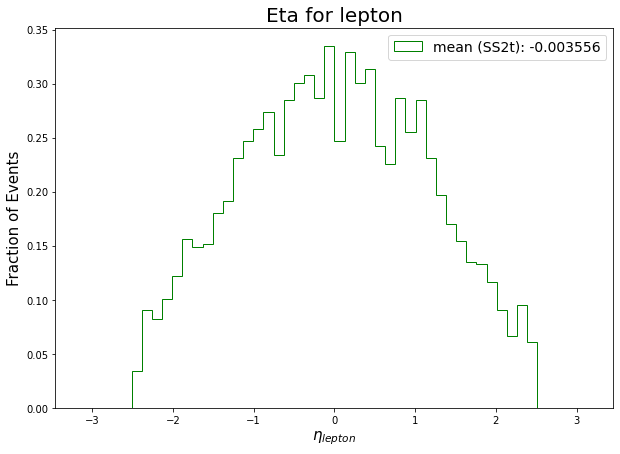

In [45]:
# Lepton Eta
plt.figure(figsize=(10, 7))
bin = np.linspace(-np.pi, np.pi, 51)
plt.hist(ak.flatten(lepton_eta), bins=bin, density=True, histtype='step', color='green', label='mean (SS2t): %f' %ak.mean(ak.flatten(lepton_eta)))
plt.legend(fontsize=14)
plt.xlabel(r'$η_{lepton}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Eta for lepton', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

100%|██████████| 2671/2671 [00:00<00:00, 3864.45it/s]


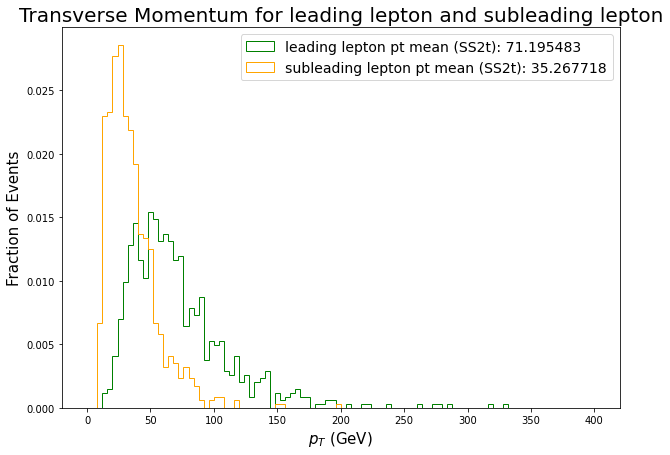

In [78]:
# Transverse Momentum of leading and subleading lepton
leading_lepton, subleading_lepton = [], []
for i in tqdm(range(EventSize)):
    if len(lepton_sort_pt[i]) >= 2:
        leading_lepton.append(lepton_sort_pt[i][0])
        subleading_lepton.append(lepton_sort_pt[i][1])
            
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 400, 101)
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', color='green', label='leading lepton pt mean (SS2t): %f' %np.mean(leading_lepton))
plt.hist(subleading_lepton, bins=bin, density=True, histtype='step', color='orange', label='subleading lepton pt mean (SS2t): %f' %np.mean(subleading_lepton))
plt.legend(fontsize=14)
plt.xlabel(r'$p_{T}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum for leading lepton and subleading lepton', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

100%|██████████| 2671/2671 [00:07<00:00, 367.24it/s]


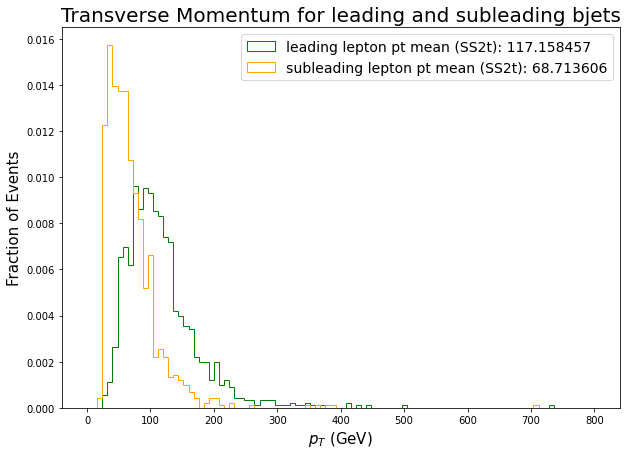

In [79]:
# Transverse Momentum of leading and subleading b-jet & Eta for b-jets
leading_bjet, subleading_bjet, eta_bjet = [], [], []
for i in tqdm(range(EventSize)):
    if len(bjet_pt[i]) >= 2:
        b_pt, b_eta  = bjet_pt[i], bjet_eta[i]
        b_pt = b_pt[ak.where(b_pt)]
        b_eta = b_eta[ak.where(b_eta)]
        b_pt = ak.sort(b_pt, ascending=False)
        if len(b_pt) >= 2:
            leading_bjet.append(b_pt[0])
            subleading_bjet.append(b_pt[1])
            eta_bjet.append(b_eta)
            
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 800, 101)
plt.hist(leading_bjet, bins=bin, density=True, histtype='step', color='green', label='leading lepton pt mean (SS2t): %f' %np.mean(leading_bjet))
plt.hist(subleading_bjet, bins=bin, density=True, histtype='step', color='orange', label='subleading lepton pt mean (SS2t): %f' %np.mean(subleading_bjet))
plt.legend(fontsize=14)
plt.xlabel(r'$p_{T}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum for leading and subleading bjets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

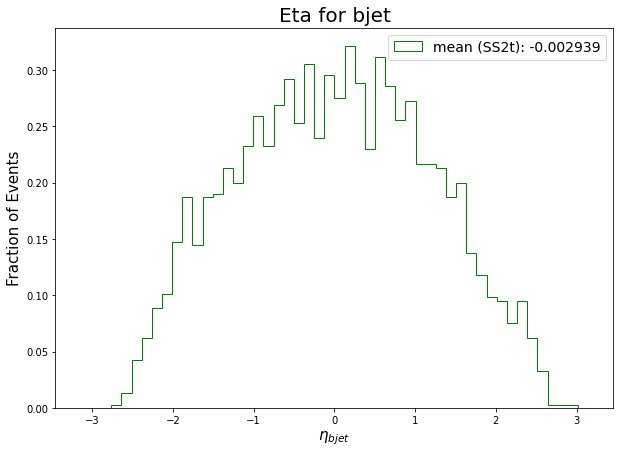

In [63]:
# Lepton Eta
plt.figure(figsize=(10, 7))
bin = np.linspace(-np.pi, np.pi, 51)
plt.hist(ak.flatten(eta_bjet), bins=bin, density=True, histtype='step', color='green', label='mean (SS2t): %f' %ak.mean(ak.flatten(eta_bjet)))
plt.legend(fontsize=14)
plt.xlabel(r'$η_{bjet}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Eta for bjet', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

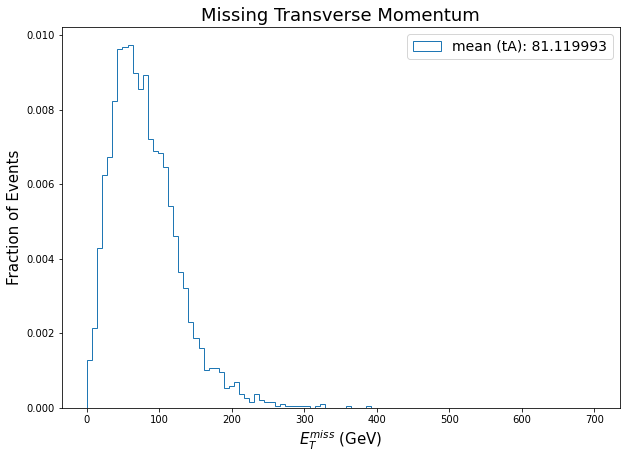

In [55]:
# Missing Transverse Momentum
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 700, 101)
plt.hist(ak.flatten(Att_Emiss['MissingET.MET']), histtype='step', density=True, bins=bin, label='mean (tA): %f' %ak.mean(Att_Emiss['MissingET.MET']))
plt.xlabel(r'$E_{T}^{miss}$ (GeV)', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Missing Transverse Momentum', fontsize=18)
plt.legend(fontsize=14)
plt.show()

100%|██████████| 2671/2671 [00:06<00:00, 388.67it/s]


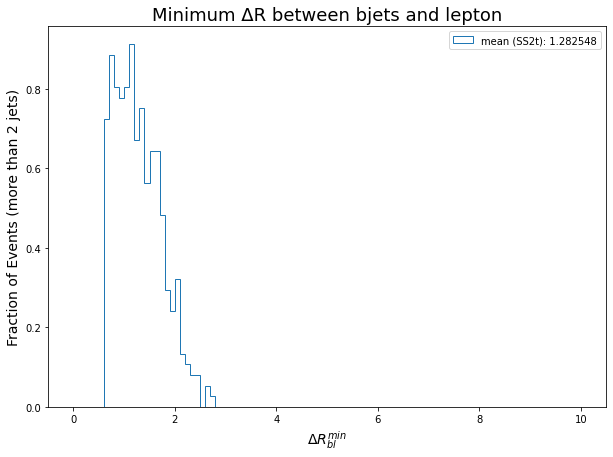

In [72]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
deltaR_bl = []
for i in tqdm(range(EventSize)):
    lep_eta, lep_phi, b_eta, b_phi = lepton_eta[i], lepton_phi[i], bjet_eta[i], bjet_phi[i]
    b_eta, b_phi = b_eta[ak.where(b_eta)], b_phi[ak.where(b_phi)]
    if len(b_eta) >= 2 and len(lep_eta) >= 2:
        deltaeta_bl = np.array([i-j for i in b_eta for j in lep_eta])
        deltaphi_bl = np.abs([i-j for i in b_phi for j in lep_phi])
        deltaphi_bl = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi_bl])
        deltaR_bl.append(min(f(deltaeta_bl, deltaphi_bl)))
        
plt.hist(deltaR_bl, bins=bin, histtype='step', density=True, label='mean (SS2t): %f' %np.mean(deltaR_bl))
plt.xlabel(r'$ΔR_{bl}^{min}$', fontsize=14)
plt.ylabel('Fraction of Events (more than 2 jets)', fontsize=14)
plt.title('Minimum \u0394R between bjets and lepton', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 2671/2671 [00:13<00:00, 200.43it/s]


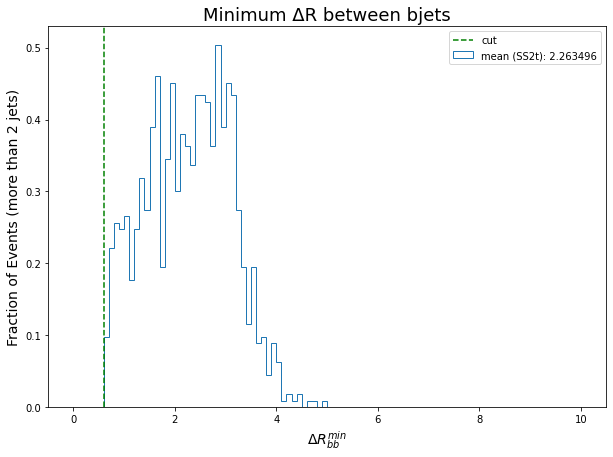

In [82]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
deltaR_bb = []
for i in tqdm(range(EventSize)):
    b_eta, b_phi = bjet_eta[i], bjet_phi[i]
    b_eta, b_phi = b_eta[ak.where(b_eta)], b_phi[ak.where(b_phi)]
    if len(b_eta) >= 2:
        m = b_eta - b_eta[:, np.newaxis]
        deltaeta_bb = m[np.triu_indices(len(m[0]), k = 1)]
        m = b_phi - b_phi[:, np.newaxis]
        deltaphi_bb = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
        deltaphi_bb = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi_bb])
        deltaR_bb.append(min(f(deltaeta_bb, deltaphi_bb)))
        
plt.hist(deltaR_bb, bins=bin, histtype='step', density=True, label='mean (SS2t): %f' %np.mean(deltaR_bb))
plt.xlabel(r'$ΔR_{bb}^{min}$', fontsize=14)
plt.axvline(x=0.6, color='g', linestyle='--', label=r'cut')
plt.ylabel('Fraction of Events (more than 2 jets)', fontsize=14)
plt.title('Minimum \u0394R between bjets', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 2671/2671 [00:06<00:00, 394.82it/s]


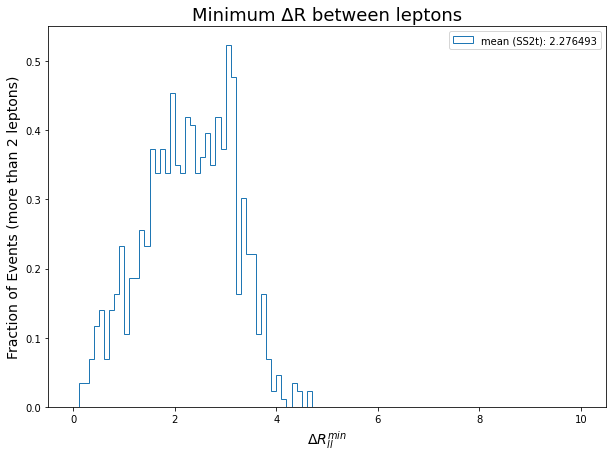

In [81]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
deltaR_ll = []
for i in tqdm(range(EventSize)):
    lep_eta, lep_phi = lepton_eta[i], lepton_phi[i]
    if len(lep_eta) >= 2:
        m = lep_eta - lep_eta[:, np.newaxis]
        deltaeta_ll = m[np.triu_indices(len(m[0]), k = 1)]
        m = lep_phi - lep_phi[:, np.newaxis]
        deltaphi_ll = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
        deltaphi_ll = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi_ll])
        deltaR_ll.append(min(f(deltaeta_ll, deltaphi_ll)))
        
plt.hist(deltaR_ll, bins=bin, histtype='step', density=True, label='mean (SS2t): %f' %np.mean(deltaR_ll))
plt.xlabel(r'$ΔR_{ll}^{min}$', fontsize=14)
plt.ylabel('Fraction of Events (more than 2 leptons)', fontsize=14)
plt.title('Minimum \u0394R between leptons', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 2671/2671 [00:00<00:00, 2800.34it/s]


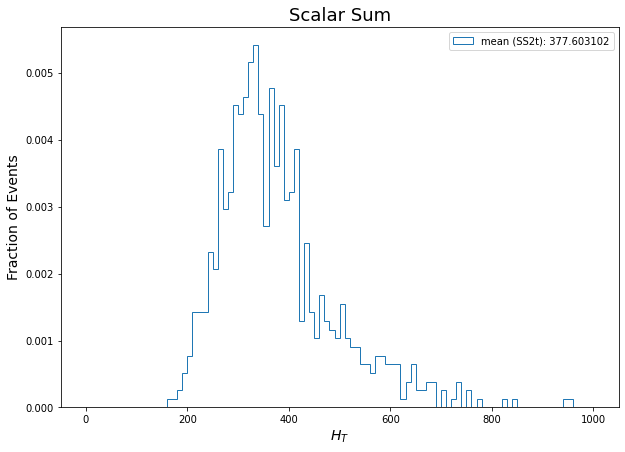

In [77]:
# HT of 2 leading leptons and three leading jets
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 1000, 101)
ht = []
for i in tqdm(range(EventSize)):
    lep_pt, jet_pt = lepton_sort_pt[i], jet_sort_pt[i]
    if len(lep_pt) >= 2 and len(jet_pt) >= 3:
        ht.append(np.sum([lep_pt[0], lep_pt[1], jet_pt[0], jet_pt[1], jet_pt[2]]))

plt.hist(ht, bins=bin, histtype='step', density=True, label='mean (SS2t): %f' %np.mean(ht))
plt.xlabel(r'$H_{T}$', fontsize=14)
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Scalar Sum', fontsize=18)
plt.legend()
plt.show()